In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

In [90]:
pokemons = pd.read_csv('pokemon.csv',sep=',')
pokemons.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Desafio 1

In [5]:
def obter_histograma(atributo, dados):
    plt.hist(dados[atributo], density=False, facecolor='g', alpha=0.75)

    plt.axvline(dados[atributo].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.xlabel('Quantidade de pokemons')
    plt.ylabel(atributo)
    plt.title('Histograma de ' + atributo)
    plt.text(125, 150, 'Teste')
    plt.grid(True)
    plt.show()

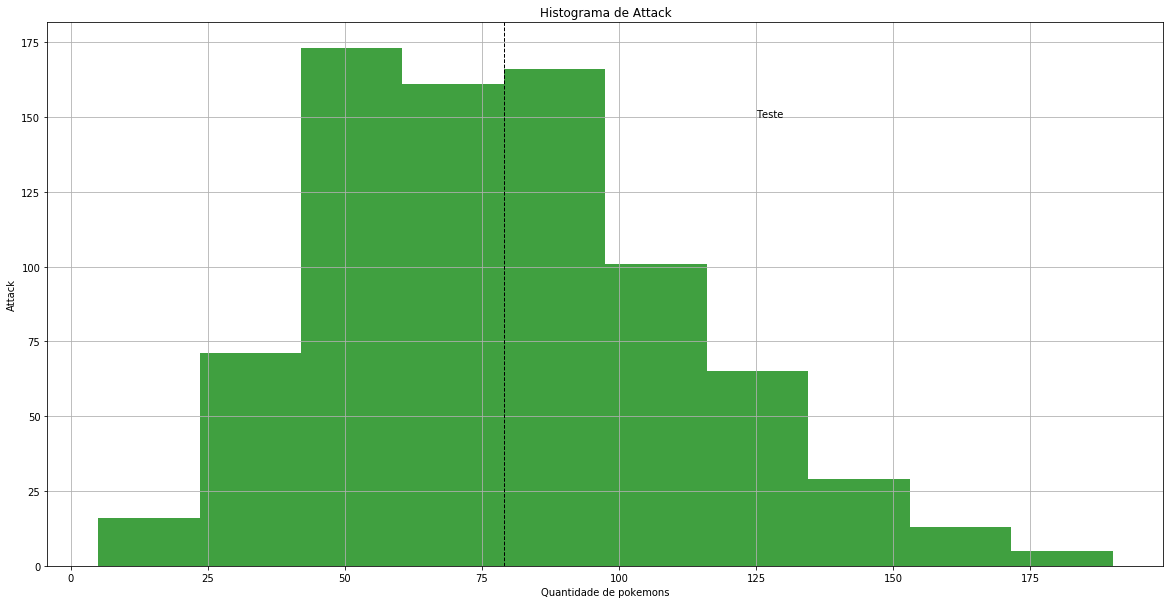

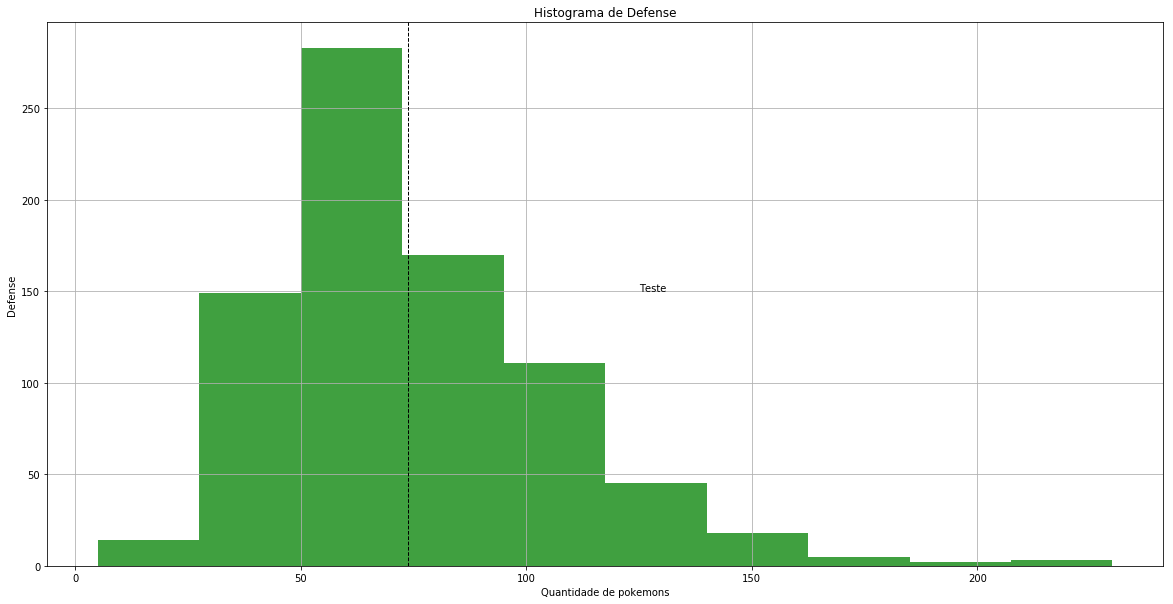

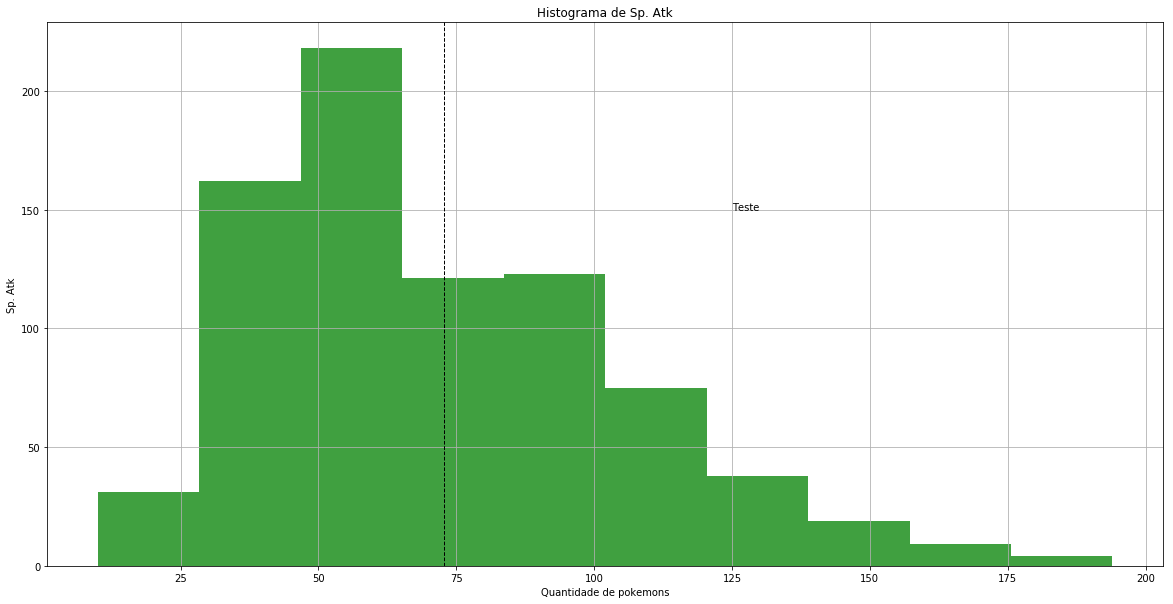

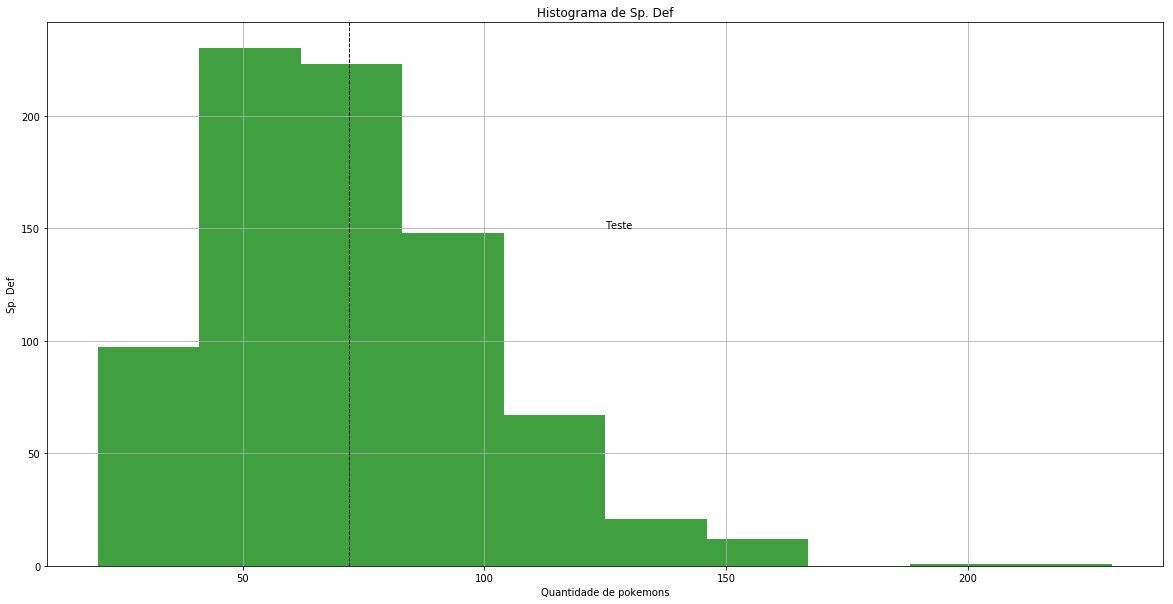

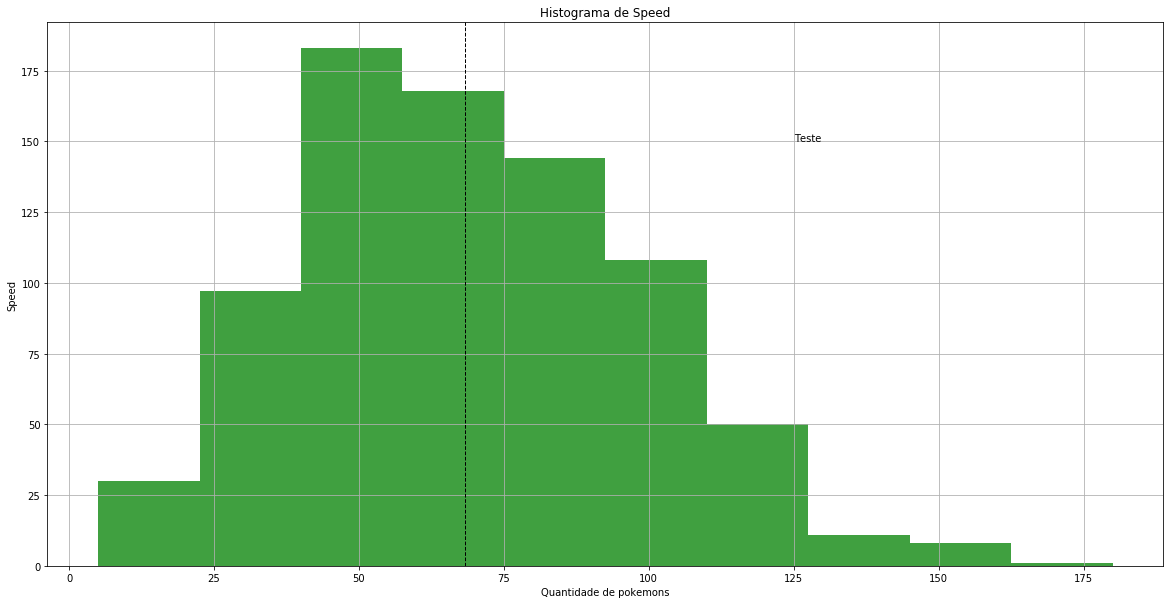

In [64]:
obter_histograma('Attack',pokemons)
obter_histograma('Defense',pokemons)
obter_histograma('Sp. Atk',pokemons)
obter_histograma('Sp. Def',pokemons)
obter_histograma('Speed',pokemons)

# Desafio 2

Text(0.5,1,'Comparação Pokemons Agua x Fogo')

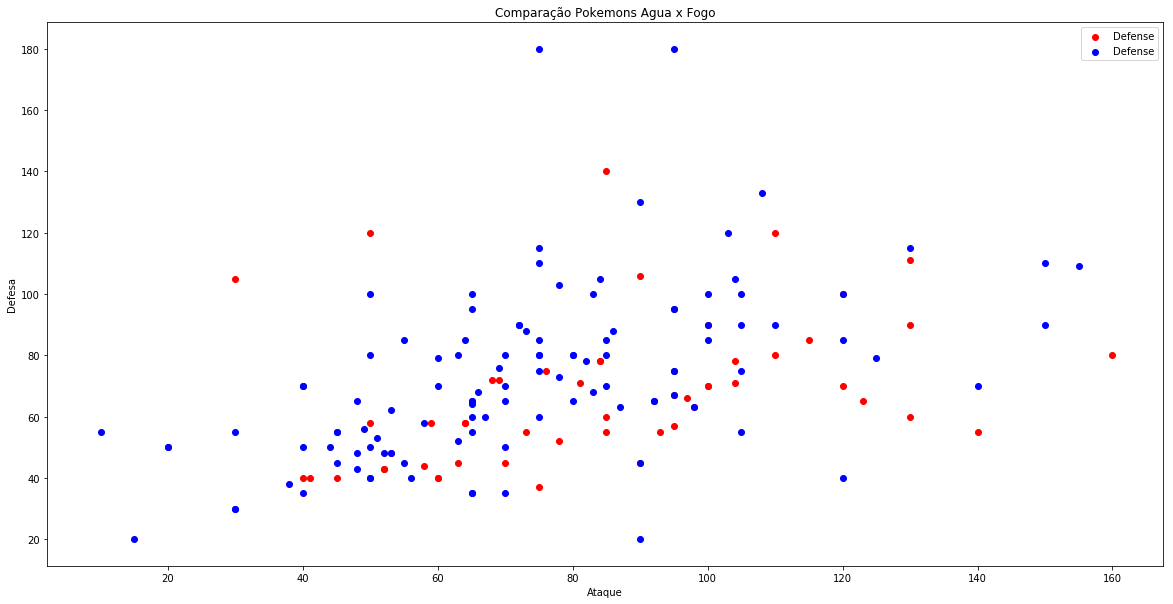

In [65]:
fogo = pokemons[pokemons['Type 1'] == 'Fire']
agua = pokemons[pokemons['Type 1'] == 'Water']

plt.scatter(fogo['Attack'], fogo['Defense'], color='r')
plt.scatter(agua['Attack'], agua['Defense'], color='b')
plt.legend()
plt.xlabel("Ataque")
plt.ylabel("Defesa")
plt.title("Comparação Pokemons Agua x Fogo")

# Desafio 3

In [67]:
dados = pokemons.groupby(by =['Generation','Type 1']).size()
geracoes, tipos = dados.index.levels
geracoes, tipos

(Int64Index([1, 2, 3, 4, 5, 6], dtype='int64', name='Generation'),
 Index(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
        'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
        'Psychic', 'Rock', 'Steel', 'Water'],
       dtype='object', name='Type 1'))

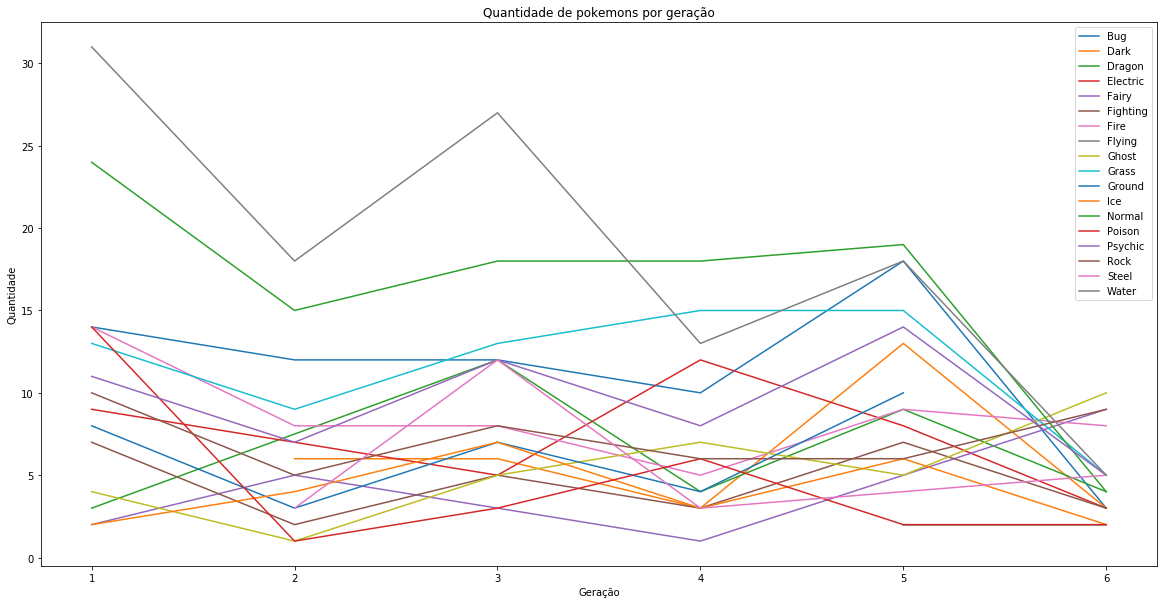

In [88]:
for tipo in tipos:
    quantidades = pokemons[pokemons['Type 1'] == tipo].groupby(['Generation']).size()  
    plt.plot(quantidades.index, quantidades, label=tipo)

plt.xlabel('Geração')
plt.ylabel('Quantidade')
plt.title("Quantidade de pokemons por geração")
plt.rcParams["figure.figsize"] = [20,10]
plt.legend()
plt.show()

# Desafio 4

In [69]:
aeroportos = data.airports()
aeroportos.head()

,iata,name,city,state,country,latitude,longitude
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [70]:
agrupado_por_estado = aeroportos.groupby(['state']).size()
agrupado_por_estado.head()

state
AK    263
AL     73
AR     74
AS      3
AZ     59
dtype: int64

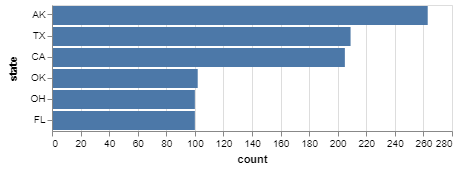

In [71]:
alt.Chart(aeroportos).transform_aggregate(
    count='count()',
    groupby=['state']
).transform_window(
    rank='rank(count)',
    sort=[alt.SortField('count', order='descending')]
).transform_filter(
    alt.datum.rank < 6
).mark_bar().encode(
    y=alt.Y('state:N',
        sort=alt.EncodingSortField(field='count', op='sum', order='descending')
    ),
    x='count:Q',
)

# Desafio 5

In [113]:
iris = data.iris()
iris.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


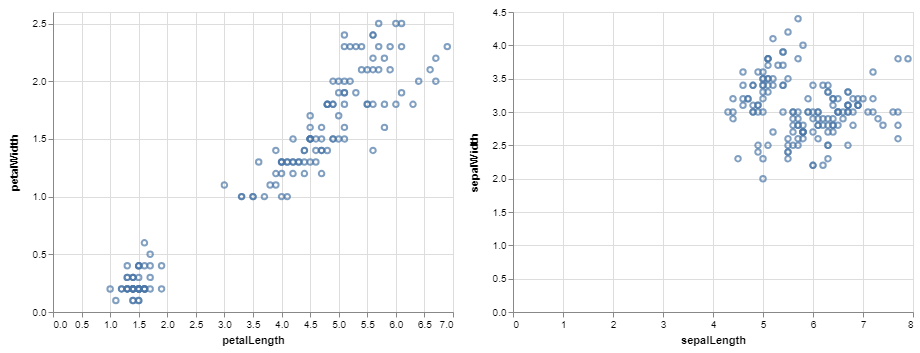

In [116]:
grafico1 = alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth'
)

grafico2 = alt.Chart(iris).mark_point().encode(
    x='sepalLength',
    y='sepalWidth'
)

grafico1 | grafico2

# Desafio 6

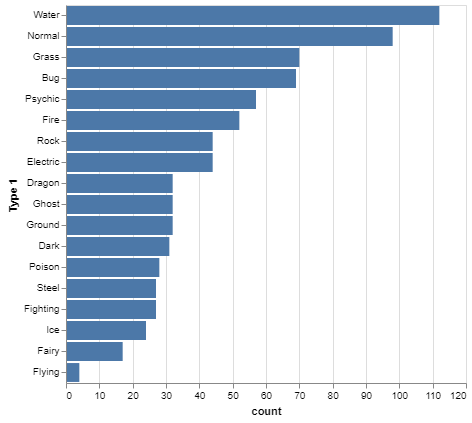

In [95]:
alt.Chart(pokemons).transform_aggregate(
    count='count()',
    groupby=['Type 1']
).transform_window(
    rank='rank(count)',
    sort=[alt.SortField('count', order='descending')]
).mark_bar().encode(
    y=alt.Y('Type 1:N',
        sort=alt.EncodingSortField(field='count', op='sum', order='descending')
    ),
    x='count:Q',
)

# Desafio 7

In [98]:
legendarios = pokemons[pokemons['Legendary'] == True].groupby(['Generation']).size()
naoLegendarios = pokemons[pokemons['Legendary'] == False].groupby(['Generation']).size()
(legendarios, naoLegendarios)

(Generation
 1     6
 2     5
 3    18
 4    13
 5    15
 6     8
 dtype: int64, Generation
 1    160
 2    101
 3    142
 4    108
 5    150
 6     74
 dtype: int64)

In [101]:
geracoes = legendarios.index
geracoes

Int64Index([1, 2, 3, 4, 5, 6], dtype='int64', name='Generation')

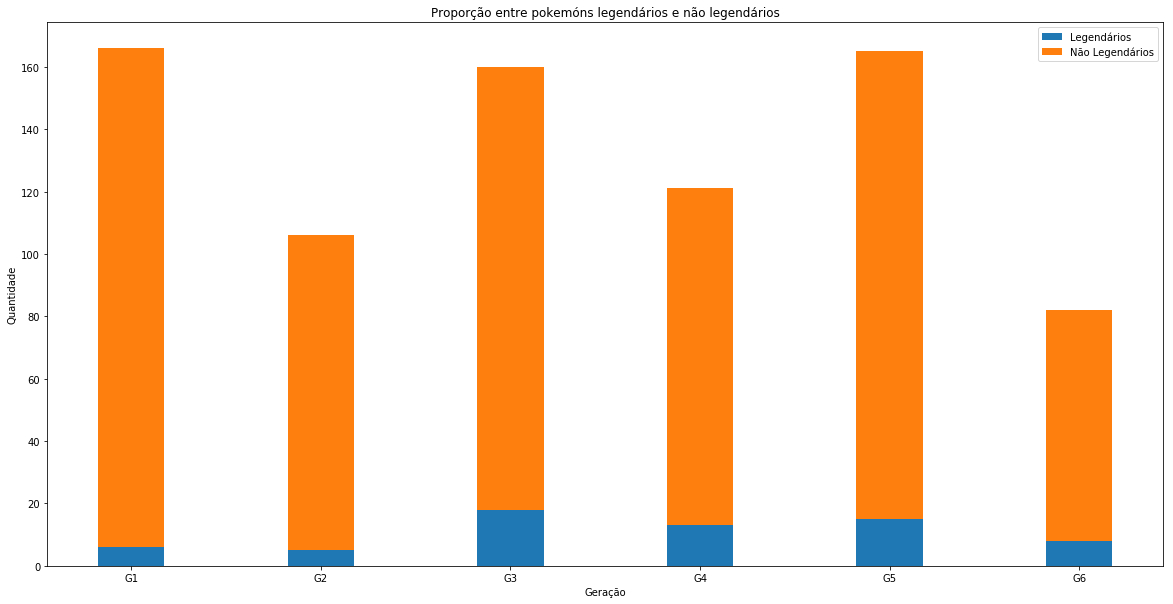

In [110]:
width = 0.35
p1 = plt.bar(geracoes, legendarios, width)
p2 = plt.bar(geracoes, naoLegendarios, width,
             bottom=legendarios)

plt.ylabel('Quantidade')
plt.xlabel('Geração')
plt.title('Proporção entre pokemóns legendários e não legendários')
plt.xticks(geracoes, ('G1', 'G2', 'G3', 'G4', 'G5', 'G6'))
plt.legend((p1[0], p2[0]), ('Legendários', 'Não Legendários'))

plt.show()